In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('IR-assignment-2-data.txt',sep=' ', header=None)

In [3]:
df_selected = data[data[1] == "qid:4"] 
df_selected

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0,NaN
99,1,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667,NaN
100,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361,NaN
101,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688,NaN


In [4]:

def findNumberOfFilesPossible(dataframe):
    numOfFilesPossible = 1
    uniqueValues = dataframe[0].unique()
    #uniqueValues contains all the unique values in the column 0 of the df_selected dataframe
    # print(uniqueValues)

    #for loop for all the unique values in the 
    for value in uniqueValues:
        #lenOflist holds the number of rows with uniqueValues for atttribute 0
        lenOflist = len(df_selected[df_selected[0]==value])
        numOfFilesPossible =  numOfFilesPossible * math.factorial(len(df_selected[df_selected[0]==value])) 

    return numOfFilesPossible
    print(numOfFilesPossible)

In [5]:
#dataframe df holds the sorted values in descending order
df = df_selected.sort_values(by = 0, ascending = False )
df = df.reset_index(drop=True)
#saving the dataframe to csv
df.to_csv('Q2_DCG.csv')

In [6]:
print("Number of files possible= ",findNumberOfFilesPossible(df_selected))

Number of files possible=  19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


In [7]:
#function to compute nDCG
def find_n_DCG(d,n):
    res = 0;
    for i in range(1,n+1):
        baselog=(np.log2(i+1))
        res += (pow(2, d[0][i-1]) - 1)/baselog
    return res

In [8]:
dcg_50 = find_n_DCG(df_selected,50)/find_n_DCG(df,50)
print("nDCG at 50:",dcg_50)

nDCG at 50: 0.35612494416255847


In [9]:
dcg_complete = find_n_DCG(df_selected,len(df_selected))/find_n_DCG(df,len(df_selected))
print("nDCG for complete dataset:",dcg_complete)

nDCG for complete dataset: 0.5784691984582591


In [10]:
file = open(r'IR-assignment-2-data.txt',encoding="unicode_escape")
filecontent = file.readlines()

In [11]:
feedback=[]
score=[]
i=0
for line in filecontent:
    i= i+1
    if line[line.find("qid:")+4:line.find("1:")-1]=="4":
        loc=line.find("75:")
        loc1=line.find("76:")
        feedback.append(int(line[0]))
        score.append(float(line[loc+3:loc1-1]))
        if float(line[loc+3:loc1-1])==0.0:
            print(line)

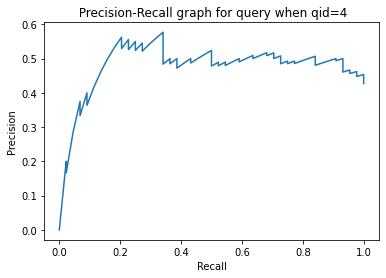

In [12]:
final_list = [x for _,x in sorted(zip(score,feedback),reverse=True)]
relevanceJudgementValue=0

listOfPrecisionValues=[]
listOfRecallValues=[]
cnt=0
relv=0
for elem in final_list:
    if elem!=0:
        relevanceJudgementValue += 1
               
        
for elem in final_list:
    cnt += 1
    if elem != 0:
        relv += 1
    listOfPrecisionValues.append(relv/cnt)
    listOfRecallValues.append(relv/relevanceJudgementValue)
    
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(" Precision-Recall graph for query when qid=4")
plt.plot(listOfRecallValues,listOfPrecisionValues)
plt.show()